<h1 style="font-size:42px; text-align:center;">3. Model Training and Evaluation</h1>
<hr>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import sklearn
import pickle

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [3]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import auc, roc_curve

In [4]:
df = pd.read_csv('./Data/final_employee_data.csv')
df.shape

(14068, 26)

# Split dataset into train and test

In [5]:
# Target variable
target = df.status

# Input features
features = df.drop('status', axis = 1)

In [6]:
target.head()

0    1
1    0
2    0
3    0
4    0
Name: status, dtype: int64

In [7]:
features.head()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure,last_evaluation_missing,unhappy,overachiever,...,department_finance,department_management,department_marketing,department_procurement,department_product,department_sales,department_support,salary_high,salary_low,salary_medium
0,221,0.0,0.932868,4,0.0,0.829896,5.0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,232,0.0,0.000000,3,0.0,0.834544,2.0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
2,184,0.0,0.788830,3,0.0,0.834988,3.0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,206,0.0,0.575688,4,0.0,0.424764,2.0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,249,0.0,0.845217,3,0.0,0.779043,3.0,0,0,1,...,0,0,0,0,0,1,0,0,1,0


* Retaining 20% of the data for testing by using parameter <code style="color:steelblue">test_size=<span style="color:crimson">0.2</span></code> in <code style="color:steelblue">train_test_split</code>
* By passing in the argument <code style="color:steelblue">stratify=<span style="color:crimson">df.status</span></code> we make sure the target variable's classes are balanced in each subset of data.

In [8]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.2,
                                                    random_state = 1234, stratify = df.status)

print('\tTrain\tTest')
print('X:\t{}\t{}'.format(len(x_train), len(x_test)))
print('Y:\t{}\t{}'.format(len(y_train), len(y_test)))

	Train	Test
X:	11254	2814
Y:	11254	2814


# Build model pipelines
* Key notations:
    * <code style="color:steelblue">l1</code> for Logistic Regression $L_1$-Regularization
    * <code style="color:steelblue">l2</code> for Logistic Regression $L_2$-Regularization
    * <code style="color:steelblue">rf</code> for Random Forest
    * <code style="color:steelblue">gb</code> for Gradient Boosted Tree

In [9]:
# Difining Pipeline dictionary
pipelines = {
    'l1': make_pipeline(StandardScaler(), LogisticRegression(penalty='l1', random_state=123)),
    'l2': make_pipeline(StandardScaler(), LogisticRegression(penalty='l2', random_state=123)),
    'rf': make_pipeline(StandardScaler(), RandomForestClassifier(random_state=123)),
    'gb': make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=123))
}

# Declaring dictionary of hyperparameters

In [10]:
# Tuneable hyperparameters of our Logistic pipeline (Similarly I've checked for other algorithms also)
pipelines['l1'].get_params()

{'memory': None,
 'steps': [('standardscaler',
   StandardScaler(copy=True, with_mean=True, with_std=True)),
  ('logisticregression',
   LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
             intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
             penalty='l1', random_state=123, solver='liblinear', tol=0.0001,
             verbose=0, warm_start=False))],
 'standardscaler': StandardScaler(copy=True, with_mean=True, with_std=True),
 'logisticregression': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
           penalty='l1', random_state=123, solver='liblinear', tol=0.0001,
           verbose=0, warm_start=False),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'logisticregression__C': 1.0,
 'logisticregression__class_weight': None,
 'logisticregression__dual': False,
 'logis

In [11]:
# L1 Logistic Regression hyperparameters
l1_hypers = {
    'logisticregression__C': np.linspace(0.001, 1000, 10)#,'logisticregression__max_iter': [100, 150, 200]
}

# L2 Logistic Regression hyperparameters
l2_hypers = {
    'logisticregression__C': np.linspace(0.001, 1000, 10)#,'logisticregression__max_iter': [100, 150, 200]
}

# Random Forest hyperparameters
rf_hypers = {
    'randomforestclassifier__n_estimators': [100, 200],
    'randomforestclassifier__max_features': ['auto', 'sqrt', 0.33]#, 0.5]
}

# Boosted Tree hyperparameters
gb_hypers = {
    'gradientboostingclassifier__learning_rate': [0.05, 0.1, 0.2],
    'gradientboostingclassifier__n_estimators': [100, 200],
    'gradientboostingclassifier__max_depth': [1, 3, 5]
}
#'gradientboostingclassifier__max_features': ['auto', 'sqrt', 0.33]#, 0.5]

In [12]:
hyperparameters = {
    'l1': l1_hypers,
    'l2': l2_hypers,
    'rf': rf_hypers,
    'gb': gb_hypers
}

# Fit, tune & cross-validate models

In [13]:
fitted_models = {}

for name, pipeline in pipelines.items():
    model = GridSearchCV(pipeline, hyperparameters[name], cv=10,n_jobs=-1)
    
    model.fit(x_train, y_train)
    fitted_models[name] = model
    
    print('{} has been fitted'.format(name))

l1 has been fitted
l2 has been fitted
rf has been fitted
gb has been fitted


# Best scores

In [14]:
for name, model in fitted_models.items():
    print('{} : {}'.format(name, model.best_score_))

l1 : 0.8229074106984183
l2 : 0.8229074106984183
rf : 0.9793851075173272
gb : 0.9748533854629465


# Area under ROC curve and Confusion matrix

In [15]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix

In [20]:
def rocplot(fpr, tpr, color, label):
    fig = plt.figure(figsize=(4,4))
    plt.title('Receiver Operating Characteristic')

    plt.plot(fpr, tpr,color, label=label)
    plt.legend(loc='lower right')

    plt.plot([0,1], [0,1], 'k-')

    plt.xlim([-0.1, 1.1])
    plt.ylim([-0.1, 1.1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.show()

In [21]:
colors = {'l1': 'g-', 
          'l2': 'b-', 
          'rf': 'r-',
          'gb': 'm-'}

l1: 0.8879285276561132
l2: 0.8879285276561133
rf: 0.992085463667323
gb: 0.9884547291159025


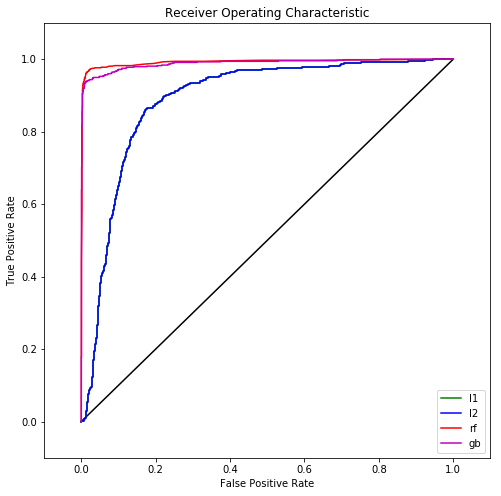

In [28]:
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')
plt.plot([0,1], [0,1], 'k-')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

predicted_probs = {}
for name, model in fitted_models.items():
    yhat = model.predict_proba(x_test)
    
    # Probability for positive class
    predicted_probs[name] = [ x[1] for x in yhat]
    
    fp, tp, _ = roc_curve(y_test, predicted_probs[name])
    plt.plot(fp, tp, colors[name], label=name)
    #rocplot(fp, tp, colors[name], name)
    print("{}: {}".format(name, auc(fp, tp)))
    
    
plt.legend(loc='lower right')
plt.show()

## Conclusion:
> * **We can see RandomForest has the maximum area under the RoC curve indicating it as best model.**<br>
> * Performance in decreasing order:<br>
    * 1. Random Forest
    * 2. Gradient Boosting Tree
    * 3. L1 & L2 regularized Logistic Regression have almost same performance

In [32]:
# Saving the best model in pickle file
with open('final_classification_model.pkl', 'wb') as f:
    pickle.dump(fitted_models['rf'].best_estimator_, f)

### Another check using <code style="color:steelblue">accuracy_score</code>

In [33]:
from sklearn.metrics import accuracy_score

In [34]:
rfhat = fitted_models['rf'].predict(x_test)

In [35]:
print('Accuracy score: {}'.format(accuracy_score(y_test, rfhat)))

Accuracy score: 0.9790334044065387


<h2 style="text-align: center">And that's how we come to an end!</h2>
<h3 style="text-align: center">Thank you! for checking out my project</h3>